In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [43]:
df=pd.read_csv('placement.csv')

In [44]:
df.sample(5)

,Unnamed: 0,cgpa,iq,placement
85,85,5.8,166.0,1
29,29,7.0,112.0,1
4,4,5.8,142.0,0
32,32,7.0,139.0,1
76,76,4.9,155.0,0


In [45]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [46]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


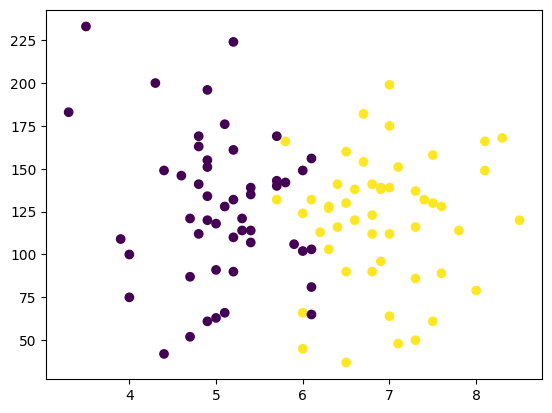

In [47]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [48]:
X=df.drop('placement',axis=1)

In [50]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [65]:
saler=StandardScaler()
X=saler.fit_transform(X)

In [66]:
y=df['placement']

In [67]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [69]:
X_train

array([[-0.51937728,  0.38798333],
       [ 0.88672027, -1.49909512],
       [ 1.76553123, -1.12167943],
       [ 1.85341233,  0.63959379],
       [-0.69513948, -0.84490793],
       [ 0.62307698,  1.46990831],
       [ 0.53519588, -0.09007654],
       [ 0.88672027,  1.89764609],
       [-0.60725838, -0.24104282],
       [-0.51937728, -0.24104282],
       [ 0.0957904 , -0.51781433],
       [-0.87090167, -1.52425617],
       [ 0.88672027,  0.38798333],
       [ 0.27155259, -0.51781433],
       [ 0.62307698,  0.76539902],
       [-1.13454496, -1.80102767],
       [-0.78302057,  0.11121182],
       [ 0.97460136, -1.90167186],
       [-0.78302057,  1.31894203],
       [ 1.15036356, -0.19072073],
       [ 0.35943369, -0.19072073],
       [-2.18911812,  2.75312165],
       [-1.83759373, -0.36684805],
       [ 0.79883917,  0.38798333],
       [-0.87090167, -0.81974688],
       [-0.95878277, -1.57457826],
       [ 0.0079093 , -0.54297537],
       [-0.95878277, -0.09007654],
       [-0.95878277,

In [70]:
y_train

12    0
64    1
58    1
37    1
28    0
     ..
77    1
89    0
52    1
75    0
10    1
Name: placement, Length: 80, dtype: int64

In [72]:
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [76]:
y_pred=clf.predict(X_test)

In [75]:
y_test

67    0
39    0
3     1
88    0
87    1
91    1
56    0
71    1
48    1
95    0
23    0
93    1
21    1
42    1
59    0
2     0
17    0
53    1
81    0
99    1
Name: placement, dtype: int64

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_test,y_pred)

0.9

In [81]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

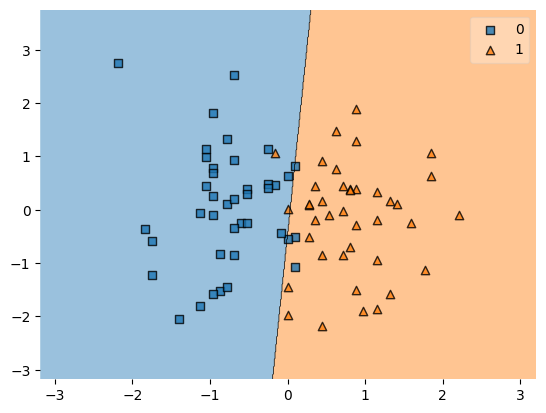

In [82]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=True)

In [83]:
import pickle

In [85]:
pickle.dump(clf,open('placement_model.pkl','wb'))